In [1]:
import pickle
import numpy as np

with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)


In [2]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [3]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [4]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [8]:
train_data[0][2]

'no'

In [9]:
vocab = set()
all_data = test_data + train_data
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

vocab.add('no')
vocab.add('yes')

vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [10]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences
max_story_len = max([len(data[0]) for data in all_data])
max_question_len = max([len(data[1]) for data in all_data])

In [23]:
vocab_size = len(vocab) + 1

In [11]:
#vectorizing the data
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

tokenizer.word_index

{'.': 7,
 '?': 8,
 'apple': 5,
 'back': 22,
 'bathroom': 18,
 'bedroom': 33,
 'daniel': 27,
 'discarded': 16,
 'down': 30,
 'dropped': 29,
 'football': 11,
 'garden': 34,
 'got': 2,
 'grabbed': 17,
 'hallway': 23,
 'in': 3,
 'is': 20,
 'john': 32,
 'journeyed': 21,
 'kitchen': 15,
 'left': 6,
 'mary': 25,
 'milk': 9,
 'moved': 26,
 'no': 1,
 'office': 35,
 'picked': 12,
 'put': 36,
 'sandra': 10,
 'the': 37,
 'there': 4,
 'to': 28,
 'took': 31,
 'travelled': 14,
 'up': 13,
 'went': 19,
 'yes': 24}

In [12]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [13]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [14]:
len(train_story_text)

10000

In [16]:
len(train_story_seq)

10000

In [17]:
#functionalise vectorization
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
   
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [18]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [19]:
inputs_test

array([[ 0,  0,  0, ..., 37, 33,  7],
       [ 0,  0,  0, ..., 37, 34,  7],
       [ 0,  0,  0, ..., 37, 34,  7],
       ...,
       [ 0,  0,  0, ..., 37,  5,  7],
       [ 0,  0,  0, ..., 37, 34,  7],
       [ 0,  0,  0, ...,  5,  4,  7]], dtype=int32)

In [20]:
queries_test

array([[20, 32,  3, 37, 15,  8],
       [20, 32,  3, 37, 15,  8],
       [20, 32,  3, 37, 34,  8],
       ...,
       [20, 25,  3, 37, 33,  8],
       [20, 10,  3, 37, 34,  8],
       [20, 25,  3, 37, 34,  8]], dtype=int32)

In [21]:
answers_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
#model
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

#placeholder for inputs
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

#building end to end memory network

#input encoder m
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

#input encoder c
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

#question encoder
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

#encoding the sequences
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

#Use dot product to compute the match between first input vector seq and the query
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#Add this match matrix with the second input vector sequence
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#concatenate
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])
print(answer)

KerasTensor(type_spec=TensorSpec(shape=(None, 6, 220), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


In [25]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_1 (Sequential)      (None, None, 64)     2432        ['input_3[0][0]']                
                                                                                                  
 sequential_3 (Sequential)      (None, 6, 64)        2432        ['input_4[0][0]']                
                                                                                              

In [27]:
# train
# filename = 'chatbot_120_epochs.h5'
# model.load_weights(filename)
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=200,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/200
313/313 [==============================] - 10s 13ms/step - loss: 0.8648 - accuracy: 0.4900 - val_loss: 0.6948 - val_accuracy: 0.4970
Epoch 2/200
313/313 [==============================] - 4s 11ms/step - loss: 0.7001 - accuracy: 0.4996 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 3/200
313/313 [==============================] - 4s 11ms/step - loss: 0.6951 - accuracy: 0.5043 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 4/200
313/313 [==============================] - 3s 11ms/step - loss: 0.6943 - accuracy: 0.5083 - val_loss: 0.6952 - val_accuracy: 0.5030
Epoch 5/200
313/313 [==============================] - 4s 11ms/step - loss: 0.6953 - accuracy: 0.4971 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 6/200
313/313 [==============================] - 3s 11ms/step - loss: 0.6944 - accuracy: 0.5034 - val_loss: 0.6940 - val_accuracy: 0.5030
Epoch 7/200
313/313 [==============================] - 4s 11ms/step - loss: 0.6951 - accuracy: 0.4944 - val_loss: 0.6932 - val_accuracy

In [29]:
filename = 'chatbot_200_epochs.h5'
model.save(filename)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


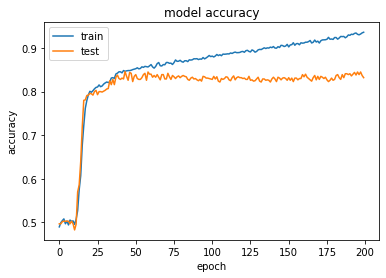

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [32]:
story =' '.join(word for word in test_data[0][0])
print(story)
query = ' '.join(word for word in test_data[0][1])
print(query)
print("True Test Answer from Data is:",test_data[0][2])
pred_results[0]

Mary got the milk there . John moved to the bedroom .
Is John in the kitchen ?
True Test Answer from Data is: no


array([1.8447715e-16, 9.9998248e-01, 1.7374173e-16, 1.5413464e-16,
       1.5751560e-16, 1.7177262e-16, 1.5085675e-16, 1.5919311e-16,
       1.6112925e-16, 1.7719552e-16, 1.9237327e-16, 1.6856144e-16,
       1.8316304e-16, 1.7194766e-16, 1.7415312e-16, 1.4212881e-16,
       1.5488909e-16, 1.5523156e-16, 1.7838648e-16, 1.6796385e-16,
       1.5142985e-16, 1.7469009e-16, 1.5181796e-16, 1.7707052e-16,
       1.7548989e-05, 1.5010591e-16, 1.5864992e-16, 1.4486239e-16,
       1.5933832e-16, 1.8729074e-16, 1.6254669e-16, 1.3873263e-16,
       1.4824342e-16, 1.6489621e-16, 1.8112377e-16, 1.4059895e-16,
       1.9944148e-16, 1.6644962e-16], dtype=float32)

In [33]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999825


In [34]:
#Remember you can only use words from the existing vocab
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_question = "Is the football in the garden ?"
mydata = [(my_story.split(),my_question.split(),'yes')]
my_story,my_ques,my_ans = vectorize_stories(mydata)
pred_results = model.predict(([ my_story, my_ques]))

In [35]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.82454896
